![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importación librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('darkgrid')
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

from keras.initializers import glorot_normal, he_normal, glorot_uniform
from keras.activations import sigmoid,tanh,relu 
from keras.optimizers import Adam, Adamax, Adagrad
from keras.models import Sequential, load_model
from keras.layers import Dense, Input, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras import backend as K

from livelossplot import PlotLossesKeras

In [2]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


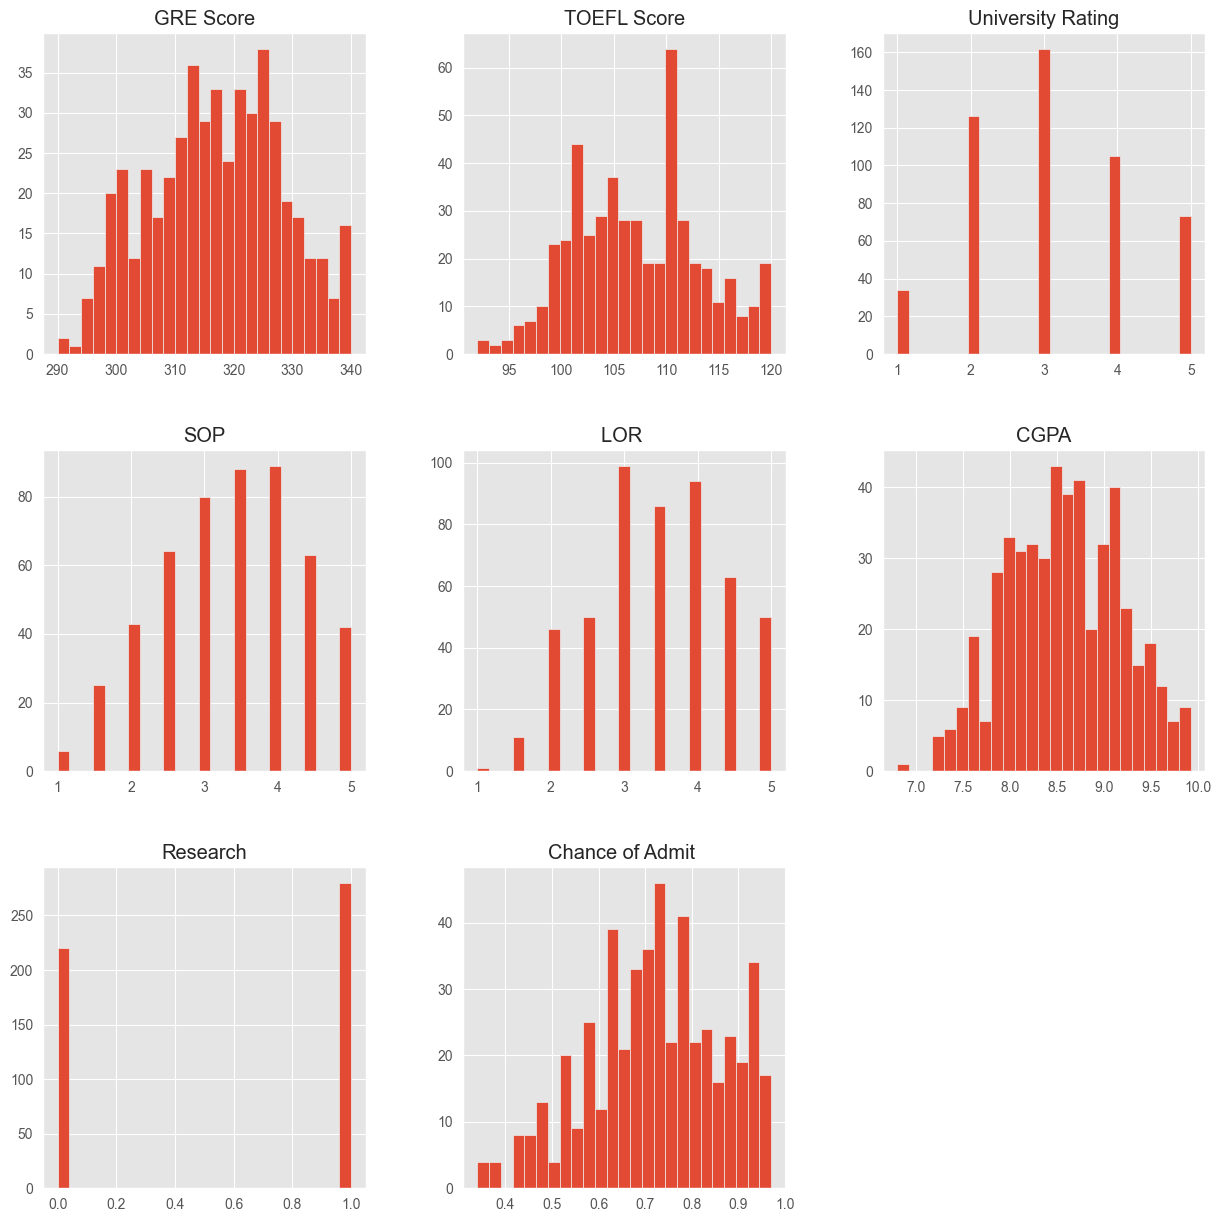

In [3]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15));
data.describe().T

In [4]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [5]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

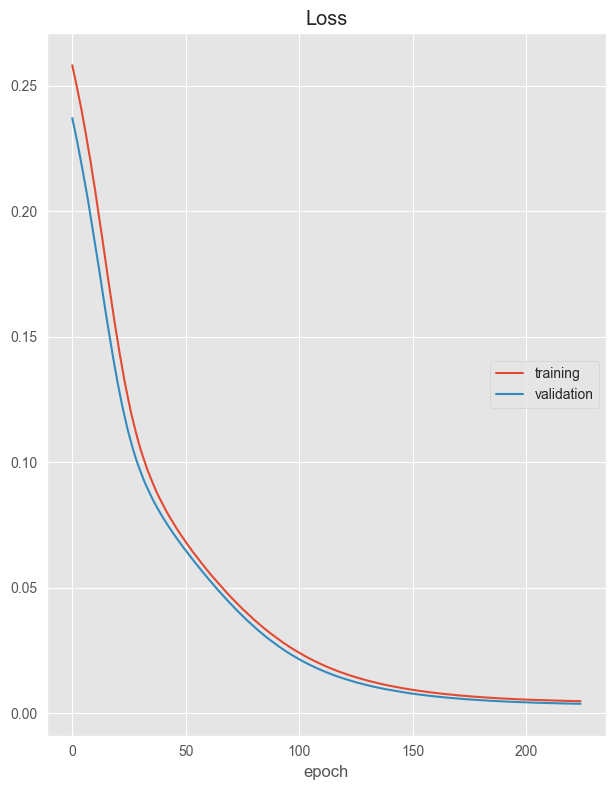

Loss
	training         	 (min:    0.005, max:    0.258, cur:    0.005)
	validation       	 (min:    0.004, max:    0.237, cur:    0.004)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0051 - val_loss: 0.0038
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
La métrica MAE para la red neural de una capa es: 0.04697
La métrica MSE para la red neural de una capa es: 0.00381


In [6]:
# Celda 1
# Normalización de los datos
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

# Inicialización de la sesión de keras
K.clear_session()

# Definición de la arquitectura de la red neuronal
output_var = 1
input_var = xTrain.shape[1]

# Definición de la función de activación, inicializador y optimizador
activator_= sigmoid 
initializer_ = glorot_normal()
optimizer_ = Adam()

# Definición de la red neuronal
model_nn = Sequential()
model_nn.add(Input(shape=(input_var,),))
model_nn.add(Dense(output_var, activation=activator_, kernel_initializer=initializer_))
model_nn.compile(optimizer= optimizer_, loss='mean_squared_error')

# Entrenamiento de la red neuronal
model_nn.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=225, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

# Evaluación de la red neuronal
yPred = model_nn.predict(xTest)

# Cálculo de la precisión de la red neuronal
mae_nn = mean_absolute_error(yTest, yPred)
mse_nn = mean_squared_error(yTest, yPred)

print(f'La métrica MAE para la red neural de una capa es: {mae_nn:.5f}')
print(f'La métrica MSE para la red neural de una capa es: {mse_nn:.5f}')


Para la red neuronal de una sola capa, se determinaron cuatro (4) parámetros principales: (1) La función de activación, (2) El inicializador, (3) El optimizador, y (4) el número de epocas. Considerando la literatura disponible, se entendió que la función de activacion *SIGMOID* es la adecuada para un rango en la variable de salida entre 0 y 1, lo cual aplica a este caso. De manera consecuente, el iniciador *glorot_normal* para la determinación inicial de los pesos, se entendió como el adecuado para una función de activación sigmoide. Para el caso del optimizador, algoritmo para adaptar entre otros la rata de apredizaje a medida que desciende por el gradiente, fue escogido como el adecuado para una variable dependiente continua.

Todo lo anterior fue corroborrado mediante pruebas de combinaciones con otras funciones de activación: *ReLU* y *tanh*, otros inicializadores: *glorot_iniform* y *he_normal*, y otros optimizadores: *SGD* y *Adamax*. Para todo los casos, la combinación descrita inicialmente y reflejada en el código fue la más estable, con una reducción en el valor de la función de pérdida rápido y la obtención de un aplanamiento en un tiempo (o númeor de épocas) considerablemente corto.

Finalmente, el número de época se determinó por ensayo y error hasta lograr una reducción en el valor de la función de pérdida inapreciable, es decir, hasta logar un aplanamiento de la curva de de pérdida.

Respecto al desempeño de la red neuronal como modelo de predicción, un MAE del 0.04408 es considerado muy bueno, considerando que el percertil 50% de la distribución de la variable dependiente (oportunidad de admisión) es 0.72. 

**NOTA**: Aunque la curva de la función de pérdida muestra valores menores para la muestra de prueba con respecto a la muestra de entrenamiento, indicando que el modelo generaliza muy bien; su cercanía podría indicar cierto nivel de -underfitting-.

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

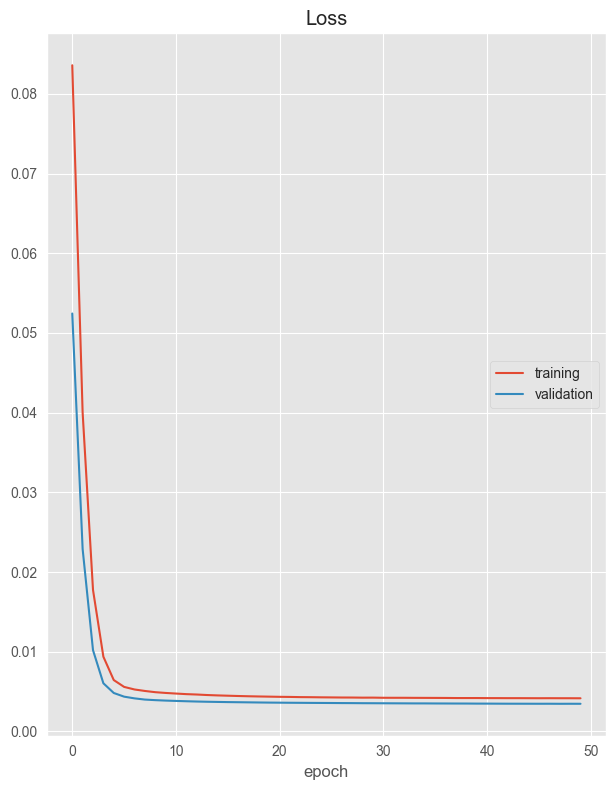

Loss
	training         	 (min:    0.004, max:    0.084, cur:    0.004)
	validation       	 (min:    0.003, max:    0.052, cur:    0.003)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0040 - val_loss: 0.0035
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
La métrica MAE para la red neural de dos capas es: 0.04489
La métrica MSE para la red neural de dos capas es: 0.00346


In [7]:
# Celda 2
K.clear_session()

# Definición de la arquitectura de la red neuronal
output_var = 1
input_var = xTrain.shape[1]

# Definición de la función de activación, inicializador y optimizador
activator_1 = sigmoid 
activator_2 = sigmoid
initializer_1 = glorot_normal()
initializer_2 = glorot_normal() 
optimizer_ = Adam()
dim = 64

# Definición de la red neuronal
model_nn2 = Sequential()
model_nn2.add(Input(shape=(input_var,)))
model_nn2.add(Dense(dim, activation=activator_2, kernel_initializer=initializer_2))
model_nn2.add(Dense(output_var, activation=activator_1, kernel_initializer=initializer_1))
model_nn2.compile(optimizer=optimizer_, loss='mean_squared_error')

# Entrenamiento de la red neuronal
model_nn2.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=50, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras()])

# Evaluación de la red neuronal
yPred2 = model_nn2.predict(xTest)

# Cálculo de la precisión de la red neuronal
mae_nn2 = mean_absolute_error(yTest, yPred2)
mse_nn2 = mean_squared_error(yTest, yPred2)

print(f'La métrica MAE para la red neural de dos capas es: {mae_nn2:.5f}')
print(f'La métrica MSE para la red neural de dos capas es: {mse_nn2:.5f}')

Para el caso de la red neuronal de dos (2) capas, se aplicó el mismo concepto para red neuroral de una sola capa, pero está vez, se consideró un función de activación y un inicializador diferentes para la capa oculta (hidden layer). Se entendió que la función *ReLU* acompañada de un inicializador *he_normal* era un pareja típica para la capas ocultas. Sin embargo, la aplicación de este concepto resultó en una curva de la función de pérdida para la muestra de entrenamiento por debajo la curva de la muestra de entrenamiento, indicando cierto nivel -overfitting-. Medienta el uso del par *SIGMOID-glorot_normal*, loas resultados fueron mejores.

Por otro lado, la dimensión o cantidad de neuronas de la capa oculta se determinó por ensayo y error, buscando una convergencia estable. Esto se logro con una capa de 64 neuronas; valores mayores resultan en una curva inestable, y valores menores resultan en métricas o errores más grandes.

Respecto al desempeño de la red neuronal como modelo de predicción, los errores MAE y MSE son muy similares a los obtenidos en la red de neural de una sola capa; sin embargo, la convergencia se logra anticipadamente, casi 5 veces más rápido, demostrando los beneficios de integrar capas ocultas al modelo.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

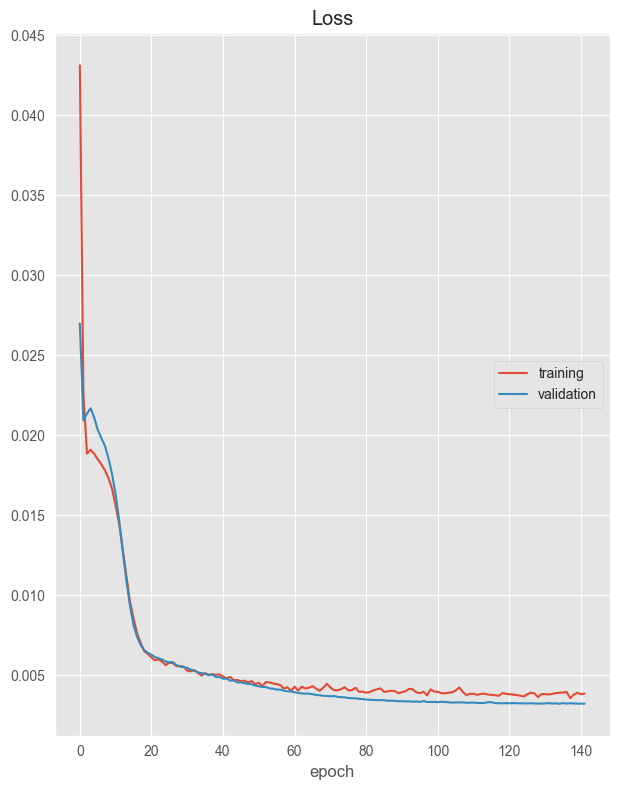

Loss
	training         	 (min:    0.004, max:    0.043, cur:    0.004)
	validation       	 (min:    0.003, max:    0.027, cur:    0.003)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 142: early stopping
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
La métrica MAE para la red neural de dos capas es: 0.04201
La métrica MSE para la red neural de dos capas es: 0.00322


In [12]:
# Celda 3
K.clear_session()

# Definición de la arquitectura de la red neuronal
output_var = 1
input_var = xTrain.shape[1]

# Definición de la función de activación, inicializador y optimizador
activator_1 = sigmoid 
activator_2 = sigmoid
initializer_1 = glorot_normal()
initializer_2 = glorot_normal() 
optimizer_ = Adam()
dim1 = 128
dim2 = 64
dim3 = 32
dim4 = 16

# Definición de la red neuronal
model_nnm = Sequential()
model_nnm.add(Input(shape=(input_var,)))
model_nnm.add(Dense(dim1, activation=activator_2, kernel_initializer=initializer_2))
model_nnm.add(Dropout(0.2))
model_nnm.add(Dense(dim2, activation=activator_2, kernel_initializer=initializer_2))
#model_nnm.add(Dropout(0.2))
model_nnm.add(Dense(dim3, activation=activator_2, kernel_initializer=initializer_2))
#model_nnm.add(Dropout(0.2))
model_nnm.add(Dense(dim4, activation=activator_2, kernel_initializer=initializer_2))
model_nnm.add(Dense(output_var, activation=activator_1, kernel_initializer=initializer_1))
model_nnm.compile(optimizer=optimizer_, loss='mean_squared_error')

# Definición de los callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=1)
fBestModel = 'best_model.keras'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

# Entrenamiento de la red neuronal
model_nnm.fit(xTrain, yTrain, 
          verbose=1, 
          epochs=225, 
          validation_data=(xTest, yTest),
          callbacks=[PlotLossesKeras(), early_stop, best_model])

# Carga del mejor modelo
model_nnm = load_model('best_model.keras')

# Evaluación de la red neuronal
yPredm = model_nnm.predict(xTest)

# Cálculo de la precisión de la red neuronal
mae_nnm = mean_absolute_error(yTest, yPredm)
mse_nnm = mean_squared_error(yTest, yPredm)

print(f'La métrica MAE para la red neural de dos capas es: {mae_nnm:.5f}')
print(f'La métrica MSE para la red neural de dos capas es: {mse_nnm:.5f}')


Para el caso de la red neuronal multicapa, se continuó con el mismo concepto de la red neuronal de dos capas en cuanto a la función de activación, el inicializador y el optimizador. Sin embargo, para esta estructura se buscaron el número óptimo de capas ocultas, la dimensión cada capa oculta, la ubicación de los -Dropouts-, y la cantidad de épocas a ser consideras en la función de -early_stopping-; todas ellas mendiante pruebas de ensayo y error. 

Para el número de capas, se determinó que cuatro (4) capas ocultas eran suficientes para disminuir el error sin incurrir en -overfitting-. Asimismo, se determinó que dimensiones distintas y decrecientes a través de las capas ocultas de la estructura de la red neuronal resultaban en un mejor desempeño del modelo en lugar de mantener el mismo número de neuronas en todas ellas. Para los -Dropouts-, el mejor resultado se obtuvo aplicando un 20% en la capa de mayor dimensión al inicio de la arquitectura y no para todas la capas ocultas. Finalmente, se determinó que 7 epocas seguidas sin mostrar una disminución significativa en la función de pérdida mostraban un balance entre rapidez y valor del error.

Utilizando la función *ModelCheckpoint*, se guardó el modelo con mejor desempeño hasta el momento de la parada temprana, para ser utilizado posteriormente en la predicción y en el cálculo del desempeño del modelo. Por otro lado, al tener un delta entre curvas de la función de pérdida para muestra de entrenamiento y de prueba (validación) que se incrementa a medida que el error se reduce para la muestra de validación, el denota que el modelo generaliza muy bien lo que descarta -overfitting'.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

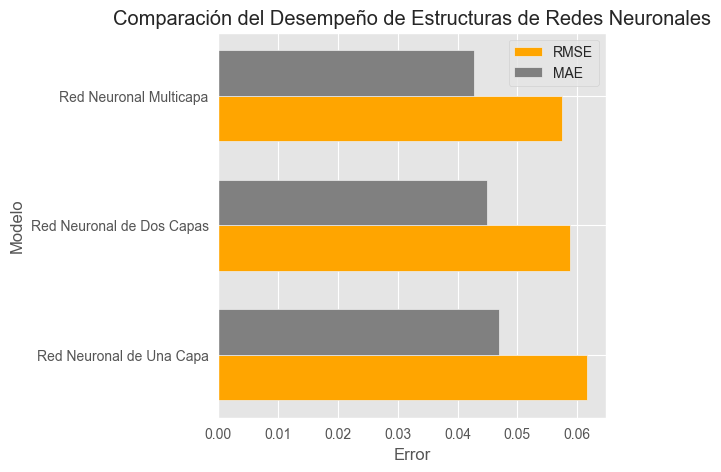

In [11]:
# Celda 4

resultados = {
    'Red Neuronal de Una Capa': [np.sqrt(mse_nn), mae_nn],
    'Red Neuronal de Dos Capas': [np.sqrt(mse_nn2), mae_nn2],
    'Red Neuronal Multicapa': [np.sqrt(mse_nnm), mae_nnm]
}

labels = list(resultados.keys())
rmse_values = [values[0] for values in resultados.values()]
mae_values = [values[1] for values in resultados.values()]
num_groups = len(resultados)

fig, ax = plt.subplots(figsize=(5, 5))
indices = np.arange(num_groups)
bar_height = 0.35

ax.barh(indices, rmse_values, height=bar_height, color='orange', label='RMSE')
ax.barh(indices + bar_height, mae_values, height=bar_height, color='gray', label='MAE')

ax.set(yticks=indices + bar_height / 2, yticklabels=labels, xlabel='Error', ylabel='Modelo')
ax.set_title('Comparación del Desempeño de Estructuras de Redes Neuronales')
ax.legend();

De acuerdo con las métricas de error MAE y RMSE, el modelo de la red neuronal con estructura multicapa muestra un mejor poder de predicción para un tiempo de entrenamiento menor, es decir, se obtiene el mejor resultado en el menor tiempo. Esto debido a que se logra un rápido aprendizaje de la red neuronal y un decrecimiento relativamente estable hasta lograr una zona aplanada de la curva de la función de pérdida sin incurrir en -overfitting-. Sin embargo, la complejidad de esta estructura require el ajuste apropiado de varios parámetros.

En el caso de la red neuronal de una sola capa, es notorio que al modelo le toma más tiempo aprender y llegar a una zona aplanada en la curva de la función de pérdida. Sin embargo, su simplicidad requiere el ajuste a unos pocos parámetros.

**NOTAS:** 
- Se calculó el RMSE basado en el MSE obtenido para cada una de las estructuras con el propósito de hacer comparables las dos métricas: MAE & RMSE, en el gráfico de barras.
- Dada la naturaleza aleatoria de las redes neuronales, los resultados no son consistentes o reproducibles. Sin embargo, los errores reportados en las métricas MAE y MSE son del mismo orden corrida tras corrida.